In [1]:
!pip install pgeocode

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode
nomi = pgeocode.Nominatim('IN')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
cleaned_invoice_data  = pd.read_csv("../input/data-loading-and-cleaning/cleaned_invoice_data.csv")
cleaned_invoice_data.drop(['Unnamed: 0'],1,inplace=True)
print(cleaned_invoice_data.shape)
cleaned_invoice_data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(489329, 29)


,Job Card No,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID
0,4,NaN,GUINDY,Retail,E4981,Tamil Nadu,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT
1,5,NaN,MUMBAI,Retail,10,Maharashtra,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE
2,6,NaN,Hyderabad,Retail,7,Andhra Pradesh,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE
3,7,NaN,nashik,Retail,11,Maharashtra,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE
4,8,NaN,Nashik,Retail,E12096,Maharashtra,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2


In [5]:
cleaned_cust_data  = pd.read_excel("../input/data-loading-and-cleaning/cleaned_cust_data.xlsx")
cleaned_cust_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_cust_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title
0,31,1,1.00,Z001,nan
1,32,2,1.00,Z005,nan
2,34,4,1.00,Z005,nan
3,35,5,1.00,Z005,nan
4,42,7,1.00,Z008,nan


In [6]:
cleaned_jtd_data  = pd.read_csv("../input/data-loading-and-cleaning/cleaned_jtd_data.csv")
cleaned_jtd_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_jtd_data.head()

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.20,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.00,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.00,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.00,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.00,EA,10691.63


In [7]:
cleaned_plant_data  = pd.read_excel("../input/data-loading-and-cleaning/cleaned_plant_data.xlsx")
cleaned_plant_data.drop(['Unnamed: 0'],1,inplace=True)
cleaned_plant_data.head()

,Plant,Name 1,House number and street,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,"Unit No.3, Kothari Compound,",400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,"18/1, C Site 4, Sahibabad",201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,"#75, Sy.No. 83/2, Panathur Mai",560087,Bengaluru,MFCB,Karnataka


1) Creating Service Time
>> Invoice  time - Job card time

In [8]:
cleaned_invoice_data.head()

,Job Card No,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID
0,4,NaN,GUINDY,Retail,E4981,Tamil Nadu,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT
1,5,NaN,MUMBAI,Retail,10,Maharashtra,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE
2,6,NaN,Hyderabad,Retail,7,Andhra Pradesh,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE
3,7,NaN,nashik,Retail,11,Maharashtra,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE
4,8,NaN,Nashik,Retail,E12096,Maharashtra,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2


In [9]:
cleaned_invoice_data['Invoice'] = cleaned_invoice_data['Invoice Date'] + " " + cleaned_invoice_data['Invoice Time']
cleaned_invoice_data["Job Card"] = cleaned_invoice_data['JobCard Date'] + " " + cleaned_invoice_data['JobCard Time']

In [10]:
cleaned_invoice_data['Invoice'] = pd.to_datetime(cleaned_invoice_data['Invoice'])
cleaned_invoice_data['Job Card'] = pd.to_datetime(cleaned_invoice_data['Job Card'])
cleaned_invoice_data.dtypes

Job Card No                    int64
Area / Locality               object
CITY                          object
Cust Type                     object
Customer No.                  object
District                      object
Gate Pass Time                object
Invoice Date                  object
Invoice No                     int64
Invoice Time                  object
JobCard Date                  object
JobCard Time                  object
KMs Reading                    int64
Labour Total                 float64
Make                          object
Misc Total                   float64
Model                         object
OSL Total                    float64
Order Type                    object
Parts Total                  float64
Pin code                       int64
Plant                         object
Plant Name1                   object
Print Status                  object
Recovrbl Exp                 float64
Regn No                       object
Technician Name               object
T

In [11]:
print(cleaned_invoice_data['Job Card'].isnull().sum())
print(cleaned_invoice_data['Invoice'].isnull().sum())

0
0


In [12]:
cleaned_invoice_data['service_time'] = cleaned_invoice_data['Invoice'] - cleaned_invoice_data['Job Card']
cleaned_invoice_data[['Invoice','Job Card','service_time']].head()

,Invoice,Job Card,service_time
0,2012-04-07 15:23:22,2012-04-01 16:14:12,5 days 23:09:10
1,2012-04-04 15:55:29,2012-04-02 12:45:04,2 days 03:10:25
2,2012-04-02 17:44:03,2012-04-02 12:47:59,0 days 04:56:04
3,2012-04-03 12:42:33,2012-04-02 13:12:04,0 days 23:30:29
4,2012-04-03 10:48:06,2012-04-02 13:58:20,0 days 20:49:46


In [13]:
cleaned_invoice_data['service_time'] = cleaned_invoice_data['service_time']/np.timedelta64(1,'h')
cleaned_invoice_data.head(20)

,Job Card No,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time
0,4,NaN,GUINDY,Retail,E4981,Tamil Nadu,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15
1,5,NaN,MUMBAI,Retail,10,Maharashtra,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17
2,6,NaN,Hyderabad,Retail,7,Andhra Pradesh,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93
3,7,NaN,nashik,Retail,11,Maharashtra,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51
4,8,NaN,Nashik,Retail,E12096,Maharashtra,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83
5,9,NaN,Nashik,Retail,E22798,Maharashtra,00:00:00,2012-04-03,7000000072,20:09:48,2012-04-02,14:18:33,78513,616.12,MARUTI SUZUKI,0.00,SWIFT,0.00,Paid Service,662.01,422000,BC03,NASHIK,NO,0.00,MH08Q5679,NaN,1278.13,BC03SA1,2012-04-03 20:09:48,2012-04-02 14:18:33,29.85
6,10,NaN,NASHIK,Retail,14,Maharashtra,00:00:00,2012-04-03,7000000070,20:00:59,2012-04-02,15:05:28,49842,1377.99,FORD,0.00,FIESTA,0.00,Paid Service,5722.37,422013,BC03,NASHIK,NO,0.00,MH41C6785,NaN,7100.36,GOLIVE,2012-04-03 20:00:59,2012-04-02 15:05:28,28.93
7,11,NaN,GUINDY,Retail,E4981,Tamil Nadu,00:00:00,2012-04-09,7000000352,17:22:33,2012-04-01,16:19:23,204207,2377.55,MAHINDRA & MAHINDRA,100.00,LOGAN P,120.00,Running Repairs,10756.82,600032,BC01,THANE,NO,0.00,MH01JA5144,4303612,13354.37,GOLIVE,2012-04-09 17:22:33,2012-04-01 16:19:23,193.05
8,12,NaN,GUINDY,Retail,E4981,Tamil Nadu,00:00:00,2012-04-21,7000000968,16:21:34,2012-04-01,16:19:26,166696,2450.40,MAHINDRA & MAHINDRA,100.00,LOGAN P,4839.96,Running Repairs,16061.47,600032,BC01,THANE,NO,0.00,MH01JA5003,4303613,23451.83,GOLIVE,2012-04-21 16:21:34,2012-04-01 16:19:26,480.04
9,13,NaN,Hyderabad,Retail,E26196,Andhra Pradesh,00:00:00,2012-04-25,7000001215,18:45:27,2012-04-01,16:19:27,1,8750.00,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,2850.00,Accidental,187754.80,502307,BC04,BALANAGAR,NO,0.00,MH12FF9716,15003154,199354.80,GOLIVE,2012-04-25 18:45:27,2012-04-01 16:19:27,578.43


2) Place - using Python library pgeocode

>> There are multiple values in City, Locality which has spelling mistake. Instead of checking and correcting better we created a new feature "Place" using pin codes and python library pgeocode

In [14]:
cleaned_invoice_data['Pin code'].head()

0    600032
1    400093
2    500038
3    422001
4    422007
Name: Pin code, dtype: int64

In [15]:
nomi.query_postal_code("600032")

postal_code                                        600032
country code                                           IN
place_name        Guindy Industrial Estate, Ekkaduthangal
state_name                                     Tamil Nadu
state_code                                             25
county_name                                       Chennai
county_code                                        603.00
community_name                   Chennai City Corporation
community_code                                        NaN
latitude                                            13.07
longitude                                           80.24
accuracy                                                1
Name: 0, dtype: object

In [16]:
cleaned_invoice_data['Pin code'].isnull().sum()

0

In [17]:
## cleaning District and City columns in invoice data
cleaned_invoice_data['clean_District'] = nomi.query_postal_code(np.array(cleaned_invoice_data["Pin code"].astype(str))).state_name

In [18]:
cleaned_invoice_data['clean_CITY'] = nomi.query_postal_code(np.array(cleaned_invoice_data["Pin code"].astype(str))).county_name

In [19]:
cleaned_invoice_data.head()

,Job Card No,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY
0,4,NaN,GUINDY,Retail,E4981,Tamil Nadu,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai
1,5,NaN,MUMBAI,Retail,10,Maharashtra,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai
2,6,NaN,Hyderabad,Retail,7,Andhra Pradesh,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad
3,7,NaN,nashik,Retail,11,Maharashtra,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik
4,8,NaN,Nashik,Retail,E12096,Maharashtra,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik


In [20]:
cleaned_invoice_data.drop(['District','CITY','Area / Locality'],1,inplace=True)

3) Age of cars - created new feature age of cars based on KM driven. 

>> Average a car drives is 15000 KM.

>> Average KM a car drives in it's lifetime is 300000

>> Dividing the age of cars in range of 3 years and one 20 years and above

>> Note: As per data there are 6200 cars whose average KMs reading is above 300000. This means this car is age is more than 20 years old which is rare. Also there are few values which indicates car has ran for approx 50 years which is very rare case. So treating them as outlier all values are bring to 300000

In [21]:
cleaned_invoice_data['KMs Reading'].describe()

count    489329.00
mean      77473.78
std      116187.22
min           0.00
25%       34101.00
50%       60097.00
75%       93776.00
max     9999999.00
Name: KMs Reading, dtype: float64

In [22]:
cleaned_invoice_data[cleaned_invoice_data['KMs Reading'] == 0.00]

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY
223163,227071,Retail,110197,00:00:00,2015-06-19,7156600129,10:18:16,2015-06-18,13:35:23,0,0.00,FORD,0.00,NaN,0.00,Running Repairs,0.00,577201,X033,X033 - TRISTAR INDIA TRADING,NO,0.00,NaN,MEHADI RAZA,0.00,X033SA1,2015-06-19 10:18:16,2015-06-18 13:35:23,20.71,Karnataka,Shivamogga


In [23]:
cleaned_invoice_data[cleaned_invoice_data['KMs Reading'] == 9999999.00]

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY
350705,356188,Retail,177979,00:00:00,2016-04-27,7166001096,12:59:59,2016-04-21,10:17:50,9999999,2425.19,FIAT,0.00,PALIO STILE,0.00,Mechanical,10404.37,440025,X080,X080 - KHAMLA MOTORS,NO,0.00,MH31DK0193,NaN,12829.56,X080WM1,2016-04-27 12:59:59,2016-04-21 10:17:50,146.70,Maharashtra,Nagpur
382088,388280,Retail,177979,00:00:00,2016-06-14,7166001494,12:35:01,2016-06-11,13:49:09,9999999,1417.07,FIAT,0.00,PALIO STILE,0.00,Running Repairs,4859.01,440025,X080,X080 - KHAMLA MOTORS,NO,0.00,MH31DK0193,NaN,6276.08,X080WM1,2016-06-14 12:35:01,2016-06-11 13:49:09,70.76,Maharashtra,Nagpur
387366,393642,Retail,177979,00:00:00,2016-06-22,7166001548,20:58:35,2016-06-20,16:57:46,9999999,2697.44,FIAT,0.00,PALIO STILE,0.00,Running Repairs,0.00,440025,X080,X080 - KHAMLA MOTORS,NO,0.00,MH31DK0193,NaN,2697.44,X080WM1,2016-06-22 20:58:35,2016-06-20 16:57:46,52.01,Maharashtra,Nagpur


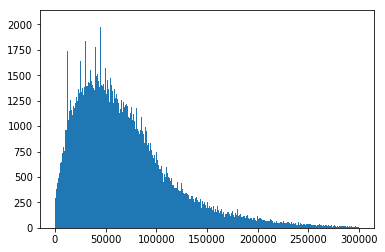

In [24]:
plt.hist(cleaned_invoice_data[cleaned_invoice_data['KMs Reading']<300000]['KMs Reading'], bins = 1000)
plt.ticklabel_format(style = 'plain')

In [25]:
cleaned_invoice_data[cleaned_invoice_data['KMs Reading'] > 285000.00].shape

(6803, 31)

In [26]:
def km(x):
    if ((x >= 0) and (x<45000)):
        return "1-3"
    elif ((x>=45000) and (x<90000)):
        return "4-6"
    elif ((x>=90000) and (x<135000)):
        return "7-9"
    elif ((x>=135000) and (x<180000)):
        return "10-12"
    elif ((x>=180000) and (x<225000)):
        return "13-15"
    elif ((x>=225000) and (x<285000)):
        return "15-18"
    else:
        return ">18"
cleaned_invoice_data['Age of cars'] = cleaned_invoice_data['KMs Reading'].apply(lambda x: km(x))

In [27]:
cleaned_invoice_data.head()

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12


In [28]:
cleaned_invoice_data['Age of cars'].value_counts()

4-6      182172
1-3      174179
7-9       78699
10-12     28879
13-15     12499
>18        6804
15-18      6097
Name: Age of cars, dtype: int64

4) Day, Month, Year

>> New feature for EDA

In [29]:
cleaned_invoice_data['Month'] = pd.to_datetime(cleaned_invoice_data['JobCard Date']).dt.month
cleaned_invoice_data['Year'] = pd.to_datetime(cleaned_invoice_data['JobCard Date']).dt.year
cleaned_invoice_data['Day'] = pd.to_datetime(cleaned_invoice_data['JobCard Date']).dt.day

In [30]:
cleaned_invoice_data.head()

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2


5) Season

>> New feature Season based on Job card date to perform EDA season wise

In [31]:
def extracting_season(x):
    if ((x>=12) or (x<=2)):
        return "Winter"
    elif ((x>=3) and (x<=5)):
        return "Summer"
    elif ((x>=6) and (x<=9)):
        return "Monsoon"
    else:
        return "Autumn"

cleaned_invoice_data['Season'] = cleaned_invoice_data['Month'].apply(lambda x: extracting_season(x))

In [32]:
cleaned_invoice_data.head()

,Job Card No,Cust Type,Customer No.,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Invoice,Job Card,service_time,clean_District,clean_CITY,Age of cars,Month,Year,Day,Season
0,4,Retail,E4981,00:00:00,2012-04-07,7000000285,15:23:22,2012-04-01,16:14:12,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,2399.95,Running Repairs,11042.62,600032,BC01,THANE,NO,0.00,MH03F9574,4303509,16998.49,SFI_ANANDT,2012-04-07 15:23:22,2012-04-01 16:14:12,143.15,Tamil Nadu,Chennai,13-15,4,2012,1,Summer
1,5,Retail,10,00:00:00,2012-04-04,7000000091,15:55:29,2012-04-02,12:45:04,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,0.00,Paid Service,1469.33,400093,BC01,THANE,NO,0.00,MH43A5790,NaN,3779.80,GOLIVE,2012-04-04 15:55:29,2012-04-02 12:45:04,51.17,Maharashtra,Mumbai,7-9,4,2012,2,Summer
2,6,Retail,7,00:00:00,2012-04-02,7000000016,17:44:03,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Paid Service,0.00,500038,BC04,BALANAGAR,NO,0.00,AP11AB0153,NaN,1340.37,GOLIVE,2012-04-02 17:44:03,2012-04-02 12:47:59,4.93,Telangana,Hyderabad,10-12,4,2012,2,Summer
3,7,Retail,11,00:00:00,2012-04-03,7000000038,12:42:33,2012-04-02,13:12:04,136240,167.36,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,0.00,Running Repairs,0.00,422001,BC03,NASHIK,NO,0.00,MH15BD5265,NaN,167.36,GOLIVE,2012-04-03 12:42:33,2012-04-02 13:12:04,23.51,Maharashtra,Nashik,10-12,4,2012,2,Summer
4,8,Retail,E12096,00:00:00,2012-04-03,7000000031,10:48:06,2012-04-02,13:58:20,140260,200.02,HYUNDAI,0.00,VERNA,0.00,Running Repairs,2106.92,422007,BC03,NASHIK,NO,0.00,MH15CD961,NaN,2306.94,BC03SA2,2012-04-03 10:48:06,2012-04-02 13:58:20,20.83,Maharashtra,Nashik,10-12,4,2012,2,Summer


In [33]:
cleaned_invoice_data.to_csv("modified_invoice_data.csv")
cleaned_jtd_data.to_csv("cleaned_jtd_data.csv")
cleaned_cust_data.to_excel("cleaned_cust_data.xlsx")
cleaned_plant_data.to_excel("cleaned_plant_data.xlsx")